# Packages

In [13]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

### Import functions ###
from utils.Auxiliary import *


# Input


In [15]:
DataType = "BostonHousing"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
AnalyzedData01 = LoadAnalyzedData(DataType, BaseDirectory, 0.01)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, 0.015)

# Results

In [18]:
### Time ###
print("DUREAL Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData01["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData01["Time_DUREAL"])/60,2)))
print("UNREAL Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData01["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData01["Time_UNREAL"])/60,2)))

print("DUREAL Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)))
print("UNREAL Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)))


DUREAL Time (minutes): Mean: 4.87| Max: 12.52
UNREAL Time (minutes): Mean: 4.89| Max: 12.45
DUREAL Time (minutes): Mean: 8.67| Max: 35.34
UNREAL Time (minutes): Mean: 8.68| Max: 35.74


(<Figure size 700x600 with 1 Axes>, <Figure size 700x600 with 1 Axes>)

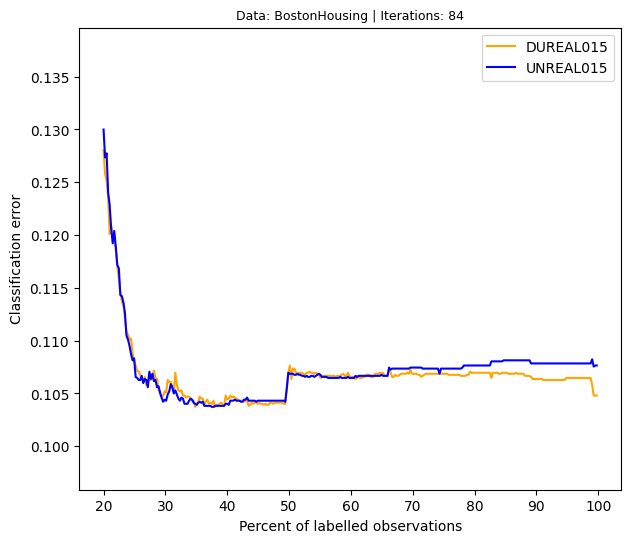

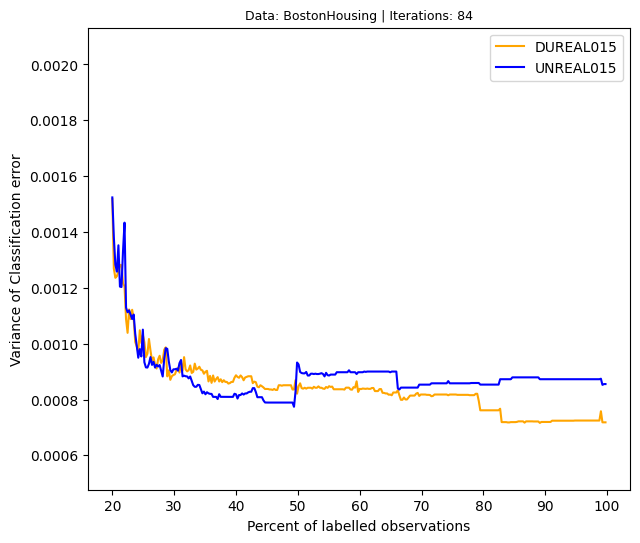

In [20]:

### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData01['Error_DUREAL'].shape[0]}"
colors = {"RandomForest" : "green",
          "DUREAL015" : "orange",
          "UNREAL015" : "blue"
          }

### Figure ##
MeanVariancePlot(RelativeError = None,
                #  RandomForest = RandomForest,
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 Colors = colors,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 CriticalValue = 1.96)

---